<a href="https://colab.research.google.com/github/MiaEastman/Introduction-to-Business-Programming/blob/main/visualise_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Tweet Analysis

## Workflow
1. Install Packages
2. Get data
3. Visually perform sentiment analysis
  * plot number of positive, negative, neutral tweets each day
  * plot the proportion of postive, negative, neutral tweets
  * create a word cloud from the tweets

## 1. Install packges

In [5]:
from google.colab import output
!pip install snscrape
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/tweets.py
!curl -Ol https://raw.githubusercontent.com/michael-borck/isys2001-worksheets/main/stopwords.py
!pip install TextBlob
!pip install WordCloud
output.clear()
print("Required packages installed")

Required packages installed


curl - used to retrieve url ... data on these links to be scrapped

## 2. Get the Data

In [2]:
from tweets import tweets_to_df
help(tweets_to_df)

Help on function tweets_to_df in module tweets:

tweets_to_df(what, since='2022-01-01', until='2022-01-31', max_tweets=500)
    Performs a simple term based search of twitter tweets to get
    the date and message of the tweet.
    
    Parameters
    ----------
    what: str
      The search term
    since: str, YYYY-MM-DD, optional
      The date to start search from (default 2022-01-01)
    until: str, YYYY-MM-DD, optional
      The date to search to (default 2022-01-31)
    max_tweets: int, optional
      The maximum number of tweets to return (default 500)
    
    Returns
    -------
    Pandas Dataframe of date and the tweet message.  The message has
    been *cleaned* to remove emojis and non english letters.



In [11]:
# Run get_tweets() method.  Your choice of keyword
search_term = input('Please input a search term: ')
tweets_df = tweets_to_df(search_term)

Please input a search term: cat


In [12]:
tweets_df.head(10)

,Date,Clean Text
0,2022-01-30,cat Vtuber
1,2022-01-30,i ll wear my cat ears for you
2,2022-01-30,Cat n o me relembres tempos de Santar m mentes...
3,2022-01-30,i feel like there s a dead cat in your walls now
4,2022-01-30,5 So this morning I rewarded myself for all th...
5,2022-01-30,When a cat chooses You or a child et feels like
6,2022-01-30,omg me too like i drew cats enough that it was...
7,2022-01-30,Gutter cats
8,2022-01-30,what is wrong with you it s terrible they can ...
9,2022-01-30,0390 wwww


## 3. Perform Sentiment Analysis
The sentiment function of textblob returns two properties, polarity, and subjectivity.

See: https://textblob.readthedocs.io/en/dev/index.html


### Polarity
Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

### Subjectivity
Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [13]:
from textblob import TextBlob

# Wrapper so can use Pandas apply() function on a column
def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

# Calculate sentiment, 
tweets_df['Subjectivity'] = tweets_df['Clean Text'].apply(getSubjectivity)
tweets_df['Polarity'] = tweets_df['Clean Text'].apply(getPolarity)

tweets_df.head(10)

,Date,Clean Text,Subjectivity,Polarity
0,2022-01-30,cat Vtuber,0.000000,0.000000
1,2022-01-30,i ll wear my cat ears for you,0.000000,0.000000
2,2022-01-30,Cat n o me relembres tempos de Santar m mentes...,0.000000,0.000000
3,2022-01-30,i feel like there s a dead cat in your walls now,0.400000,-0.200000
4,2022-01-30,5 So this morning I rewarded myself for all th...,0.523810,0.063095
5,2022-01-30,When a cat chooses You or a child et feels like,0.000000,0.000000
6,2022-01-30,omg me too like i drew cats enough that it was...,0.388889,-0.111111
7,2022-01-30,Gutter cats,0.000000,0.000000
8,2022-01-30,what is wrong with you it s terrible they can ...,0.950000,-0.750000
9,2022-01-30,0390 wwww,0.000000,0.000000


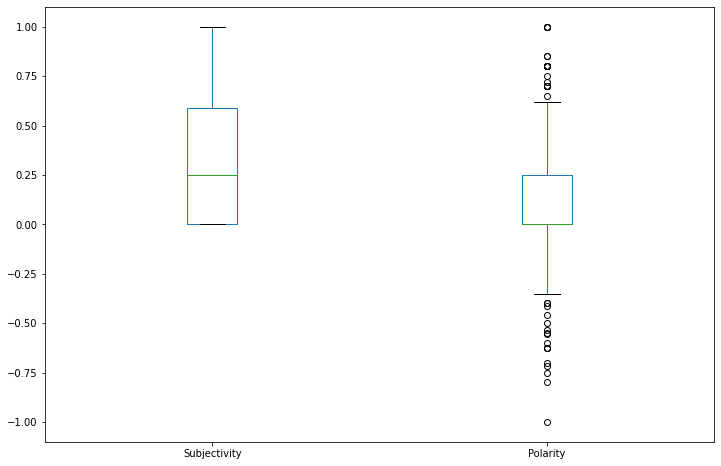

In [16]:
# Do a box plot of columns Subjectivity and Polarity
tweets_df.boxplot(column=['Subjectivity', 'Polarity'], grid=False, figsize=(12,8))

# Sentiment over time.

From the documentaiton, the values of polsrity can be interpreted a sentiment.  So we can *calculate* the sentiment of each tweet as either positive, negative or neutral.

> There are more precise ways, keeping it simple for thie exercise.

It could be interesting to plot these over time.  SO each day there is a number of tweets, what proportions are positive, negative or neutral.

First let us add a sentiment column


In [17]:
def sentiment(polarity):
  if polarity > 0:
      return 'positive'
  elif polarity == 0:
      return 'neutral'
  else:
      return 'negative'

In [18]:
# Add sentiment column
tweets_df['Sentiment'] = tweets_df['Polarity'].apply(sentiment)
tweets_df.head(10)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
0,2022-01-30,cat Vtuber,0.000000,0.000000,neutral
1,2022-01-30,i ll wear my cat ears for you,0.000000,0.000000,neutral
2,2022-01-30,Cat n o me relembres tempos de Santar m mentes...,0.000000,0.000000,neutral
3,2022-01-30,i feel like there s a dead cat in your walls now,0.400000,-0.200000,negative
4,2022-01-30,5 So this morning I rewarded myself for all th...,0.523810,0.063095,positive
5,2022-01-30,When a cat chooses You or a child et feels like,0.000000,0.000000,neutral
6,2022-01-30,omg me too like i drew cats enough that it was...,0.388889,-0.111111,negative
7,2022-01-30,Gutter cats,0.000000,0.000000,neutral
8,2022-01-30,what is wrong with you it s terrible they can ...,0.950000,-0.750000,negative
9,2022-01-30,0390 wwww,0.000000,0.000000,neutral


In [21]:
# Lets get just the positive tweets
pos = tweets_df[tweets_df['Sentiment']=='positive']
pos.head(10)

,Date,Clean Text,Subjectivity,Polarity,Sentiment
4,2022-01-30,5 So this morning I rewarded myself for all th...,0.523810,0.063095,positive
10,2022-01-30,melohiluvr i feel like more needs to be addres...,0.750000,0.250000,positive
11,2022-01-30,Well cats generally love a nice cozy spot to p...,0.600000,0.183333,positive
15,2022-01-30,This Cat no pun intended on Jan 29 2022 picked...,0.675000,0.200000,positive
18,2022-01-30,I found this box with some nice padding to chi...,0.850000,0.500000,positive
22,2022-01-30,Alice X Your Cool for cats Let s face it you h...,0.375000,0.175000,positive
24,2022-01-30,Good damn you big cat how dare you jinx us wtf...,0.566667,0.066667,positive
29,2022-01-30,for i second i was like how tf does your car f...,0.466667,0.333333,positive
30,2022-01-30,THERE ARE 11 ANIMALS 5 CATS amp 6 DOGS AT RISK...,0.066667,0.033333,positive
32,2022-01-30,cat They did say on their discord that 40k peo...,0.533333,0.266667,positive


Write a function to calculate how many each day.  We will write a function because want to do this for negative and netural tweets.

In [22]:
def num_tweets(df):
    return df['Date'].value_counts().sort_index()

pos_per_day = num_tweets(pos)

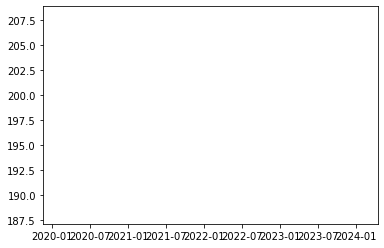

In [28]:
# Plot the positive tweets per day
pos_per_day.plot()

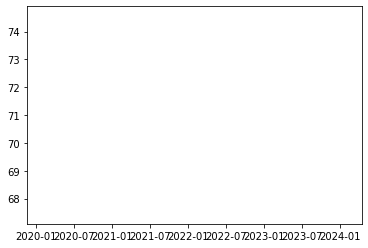

In [32]:
# Now repeat for negative
neg = tweets_df[tweets_df['Sentiment']=='negative']
neg_per_day = num_tweets(neg)
neg_per_day.plot()

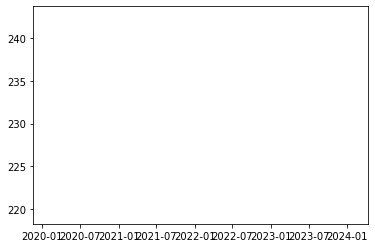

In [33]:
# repeat for neutral
neu = tweets_df[tweets_df['Sentiment']=='neutral']
neu_per_day = num_tweets(neu)
neu_per_day.plot()

How about propotions of sentiment type?

Visit Python Graph Gallery, 'Part of the Whole', select 'Pie' and loot at the example

([<matplotlib.patches.Wedge at 0x7f08c67ffc10>,
 [Text(0.3530379778108909, 1.0418081331143452, ''),
  Text(-1.0764389950124393, 0.22644886843746745, ''),
  Text(0.13100693582210352, -1.092170857863596, '')])

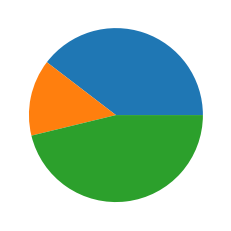

In [34]:
import matplotlib.pyplot as plt
values = [len(pos),len(neg),len(neu)]
plt.pie(values)

We can do better. 

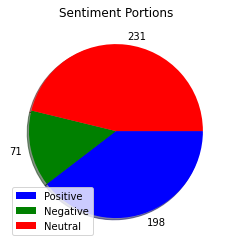

In [39]:
import matplotlib.pyplot as plt
 
values = [len(pos),len(neg),len(neu)]
labels = ['Positive','Negative','Neutral']
colors = ['b','g','r']
plt.pie(values, colors=colors, labels= values, counterclock=False, shadow=True)
plt.title('Sentiment Portions')
plt.legend(labels,loc=3)
plt.show()

## WordCloud

Visit Python Graph Gallery, 'Ranking', select 'Word Cloud' and loot at the example

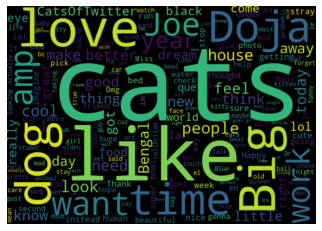

In [36]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from stopwords import ENGLISH_STOP_WORDS

# Get all the messages
messages = ' '.join(tweets_df['Clean Text'])

stop_words = ENGLISH_STOP_WORDS.add(search_term)    
# Create the wordcloud object
wordcloud = WordCloud(width=680, height=480, margin=0, 
                      stopwords=ENGLISH_STOP_WORDS).generate(messages)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()